In [3]:
import numpy as np
import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile
import scipy 
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [4]:
df = pd.read_excel('colorado_final.xlsx')

In [5]:
df.columns = ['City', 'Population', 'Violent Crime', 'Murder', 'Rape', 'Robbery', 'Assault', 'Property Crime', 'Burgalry', 'Larcency', 'Motor', 'Arson']

In [6]:
df.head()

,City,Population,Violent Crime,Murder,Rape,Robbery,Assault,Property Crime,Burgalry,Larcency,Motor,Arson
0,Arvada,110792,163,0,33,34,96,2666,331,2138,197,22
1,Aspen,6685,14,0,5,0,9,314,17,286,11,0
2,Ault,1565,0,0,0,0,0,2,0,0,2,0
3,Aurora,343484,1436,23,224,468,721,10786,1981,7805,1000,80
4,Avon,6336,9,0,3,0,6,140,12,124,4,1


In [7]:
features = pd.get_dummies(df['Murder'])
features['Murder_Rate'] = np.where(df['Murder']>= 1, 1, 0)

In [8]:
print(df['Murder'].groupby(features['Murder_Rate']).describe())

             count      mean       std  min  25%  50%  75%   max
Murder_Rate                                                     
0            111.0  0.000000  0.000000  0.0  0.0  0.0  0.0   0.0
1             24.0  5.583333  9.810893  1.0  1.0  2.0  5.0  40.0


In [10]:
features['Robbery_Rate'] = np.where(df['Robbery'] >= 1, 1, 0)
print(df['Robbery'].groupby(features['Robbery_Rate']).describe())

              count       mean         std  min  25%  50%   75%     max
Robbery_Rate                                                           
0              71.0   0.000000    0.000000  0.0  0.0  0.0   0.0     0.0
1              64.0  45.671875  160.277642  1.0  1.0  3.5  19.0  1132.0


In [11]:
features['Population_Square'] = df['Population'] ** 2

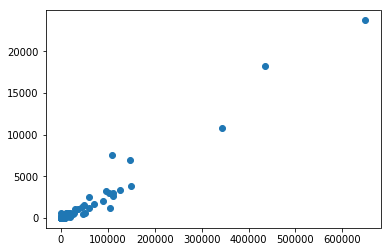

In [12]:
x = df['Population']
y = df['Property Crime']
plt.scatter(x,y)
plt.show()

In [13]:
features['Population_Segment'] = df.loc[df['Population'] < 200000, 'Population']

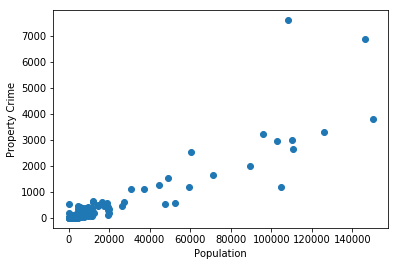

In [14]:
x = features['Population_Segment']
y = df['Property Crime']
plt.scatter(x,y)
plt.xlabel('Population')
plt.ylabel('Property Crime')
plt.show()

In [15]:
from sklearn import linear_model
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

In [16]:
#Comparing Property Crime to Murder and Robbery and Population 

regr = linear_model.LinearRegression()
Y = df['Property Crime'].values.reshape(-1, 1)
X = df[['Population', 'Murder', 'Robbery']]
regr.fit(X, Y)
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X,Y))


Coefficients: 
 [[ 0.02873714 14.29751819  5.05322771]]

Intercept: 
 [-38.39153525]

R-squared:
0.9630837826662033


In [19]:
data = X 
target = Y 

In [26]:
from sklearn.model_selection import train_test_split
# Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=20)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(108, 3) (108, 1)
(27, 3) (27, 1)


In [58]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
sample = lm.fit(data, target)
predictions = lm.predict(X_test)

In [59]:
predictions[0:10]

array([[ -12.0395754 ],
       [ 300.52390561],
       [ 337.33758664],
       [ 468.95370016],
       [  74.28680124],
       [ 219.519811  ],
       [ -27.61510674],
       [  52.61448625],
       [3317.26372005],
       [ 117.28370618]])

Text(0, 0.5, 'Predictions')

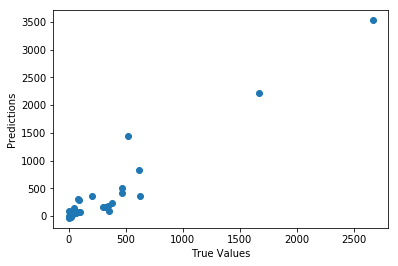

In [32]:
plt.scatter(y_test, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")

In [63]:
#Accuracy of Model Score with 20% hold out vs Sample

print(" 20% Hold Out Score", model.score(X_test, y_test))
print("Overall Sample Score: ", sample.score(data, target))

 20% Hold Out Score 0.8065189115833553
Overall Sample Score:  0.9630837826662033


In [66]:
# There is over fitting based on variance on the data 

from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, data, target, cv = 6)
print("Cross-Validated Scores: ", scores)

Cross-Validated Scores:  [0.87160743 0.92685317 0.9439065  0.87908228 0.63038391 0.93896423]


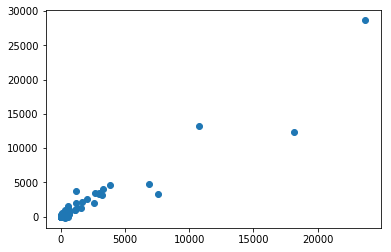

In [67]:
from sklearn.model_selection import cross_val_predict
predictions = cross_val_predict(model, data, target, cv = 6)
plt.scatter(target, predictions)
plt.show()

In [52]:
# This is R squared which indicates the proprtion of the variance in the dependent variable that is predictable from the independent variable
from sklearn import metrics
accuracy = metrics.r2_score(target, predictions)
print("Cross-Predicted Accuracy", accuracy)

Cross-Predicted Accuracy 0.9075654914365264
